# Venus to sky ratio

It is important to know what the venus to sky ratio of these observations is. In order to do that, you can subtract the venus spectrum from the only sky spectrum and see what percentage is left.

More sky data may need to be taken as our observations start to continue going into the night and the venus-to-sky ratio changes drastically during sunset.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [11]:
# Extracts times, wavelengths, and fluxes from raw data files
def get_data(filename):
    # Open the file and save the first two lines
    f = open(filename,'r')
    line1 = f.readline() # Date and start time of observations in UTC
    line2 = f.readline() # Exposure time used for observations
    f.close()
    # Reads in wavelengths for each column listed in the third line of the file
    wlen = np.genfromtxt(filename,delimiter=',',skip_header=2,max_rows=1)[1:]
    
    # Pull start time (UTC) from first line & save as float
    hour = float(line1[21:23])
    minute = float(line1[24:26])
    second = float(line1[27:])
    start_time = hour + minute/60 + second/3600
    
    # Reads the time and flux data
    dat = np.genfromtxt(filename,skip_header=3,skip_footer=1,delimiter=',')
    
    # Saves time and flux data as separate arrays
    time = dat[:,0]/3600+start_time
    allflux = dat[:,1:]
    return wlen,allflux,time[1:]

In [3]:
def venus_to_sky_ratio(wlen,venus,sky):
    inrange = np.where((wlen < 450)&(wlen > 360))[0]
    venussum = np.sum(venus[inrange])
    skysum = np.sum(sky[inrange])
    return (venussum-skysum)/skysum

In [66]:
dark0530 = '../venus_data/20180530/dark7s_1.dat'
wavelen0530,darkflux0530,darktime0530 = get_data(dark0530)
darkflux0530 = darkflux0530[1:]
meandark0530 = np.mean(darkflux0530,axis=0)

sky0529 = '../venus_data/20180529/sky_1.dat'
wavelen,rawskyflux0529,skytime0529 = get_data(sky0529)
rawskyflux0529 = rawskyflux0529[1:]
skyflux0529 = np.array([np.subtract(i,meandark0530) for i in rawskyflux0529])

venus0529 = '../venus_data/20180529/venus_2.dat'
wavelen,rawvenusflux0529,venustime0529 = get_data(venus0529)
rawvenusflux0529 = rawvenusflux0529[1:]
venusflux0529 = np.array([np.subtract(i,meandark0530) for i in rawvenusflux0529])

In [62]:
sky0530 = '../venus_data/20180530/sky_1.dat'
wavelen,rawskyflux0530,skytime0530 = get_data(sky0530)
rawskyflux0530 = rawskyflux0530[1:]
skyflux0530 = np.array([np.subtract(i,meandark0530) for i in rawskyflux0530])

venus0530 = '../venus_data/20180530/venus_2.dat'
wavelen,rawvenusflux0530,venustime0530 = get_data(venus0530)
rawvenusflux0530 = rawvenusflux0530[1:]
venusflux0530 = np.array([np.subtract(i,meandark0530) for i in rawvenusflux0530])

In [69]:
dark0531 = '../venus_data/20180531/dark7s_1.dat'
wavelen0531,darkflux0531,darktime0531 = get_data(dark0531)
darkflux0531 = darkflux0531[1:]
meandark0531 = np.mean(darkflux0531,axis=0)

sky0531 = '../venus_data/20180531/sky_1.dat'
wavelen,rawskyflux0531,skytime0531 = get_data(sky0531)
rawskyflux0531 = rawskyflux0531[1:]
skyflux0531 = np.array([np.subtract(i,meandark0531) for i in rawskyflux0531])

venus0531 = '../venus_data/20180531/venus_2.dat'
wavelen,rawvenusflux0531,venustime0531 = get_data(venus0531)
rawvenusflux0531 = rawvenusflux0531[1:]
venusflux0531 = np.array([np.subtract(i,meandark0531) for i in rawvenusflux0531])

In [63]:
dark0605 = '../venus_data/20180605/dark7s_1.dat'
wavelen0605,darkflux0605,darktime0605 = get_data(dark0605)
darkflux0605 = darkflux0605[1:]
meandark0605 = np.mean(darkflux0605,axis=0)

sky0605 = '../venus_data/20180605/sky_1.dat'
wavelen,rawskyflux0605,skytime0605 = get_data(sky0605)
rawskyflux0605 = rawskyflux0605[1:]
skyflux0605 = np.array([np.subtract(i,meandark0605) for i in rawskyflux0605])

venus0605 = '../venus_data/20180605/venus_2.dat'
wavelen,rawvenusflux0605,venustime0605 = get_data(venus0605)
rawvenusflux0605 = rawvenusflux0605[1:]
venusflux0605 = np.array([np.subtract(i,meandark0605) for i in rawvenusflux0605])

In [64]:
sky0606 = '../venus_data/20180606/sky_1.dat'
wavelen,rawskyflux0606,skytime0606 = get_data(sky0606)
rawskyflux0606 = rawskyflux0606[1:]
skyflux0606 = np.array([np.subtract(i,meandark0605) for i in rawskyflux0606])

venus0606 = '../venus_data/20180606/venus_2.dat'
wavelen,rawvenusflux0606,venustime0606 = get_data(venus0606)
rawvenusflux0606 = rawvenusflux0606[1:]
venusflux0606 = np.array([np.subtract(i,meandark0605) for i in rawvenusflux0606])

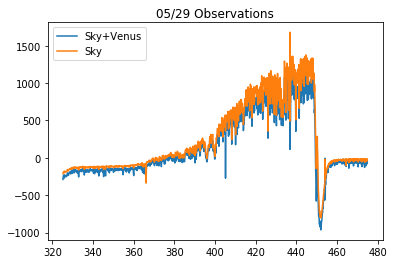

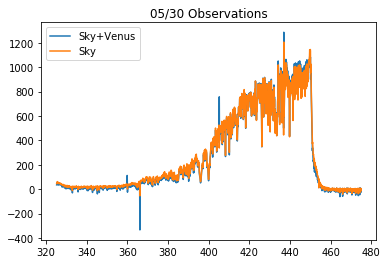

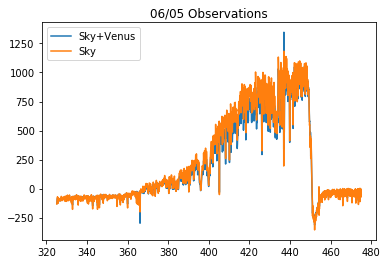

In [75]:
plt.plot(wavelen,np.mean(venusflux0529[:11],axis=0),label='Sky+Venus')
plt.plot(wavelen,np.mean(skyflux0529,axis=0),label='Sky')
plt.title('05/29 Observations')
plt.legend()
plt.show()

plt.plot(wavelen,np.mean(venusflux0530[:11],axis=0),label='Sky+Venus')
plt.plot(wavelen,np.mean(skyflux0530,axis=0),label='Sky')
plt.title('05/30 Observations')
plt.legend()
plt.show()

plt.plot(wavelen,np.mean(venusflux0605[:11],axis=0),label='Sky+Venus')
plt.plot(wavelen,np.mean(skyflux0605,axis=0),label='Sky')
plt.title('06/05 Observations')
plt.legend()
plt.show()

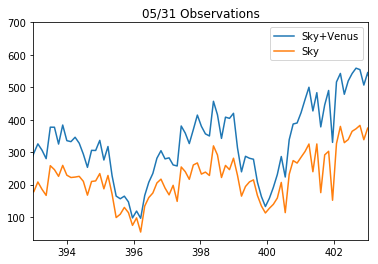

0.226500068439


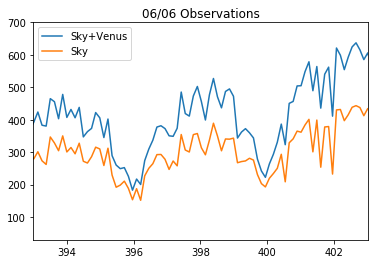

0.284146253066


In [109]:
plt.plot(wavelen,np.mean(venusflux0531[:11]+100,axis=0),label='Sky+Venus')
plt.plot(wavelen,np.mean(skyflux0531+100,axis=0),label='Sky')
plt.title('05/31 Observations')
#whole spectrum
#plt.xlim(360,450)
#plt.ylim(-100,1500)

#ca lines
plt.xlim(393,403)
plt.ylim(30,700)
plt.legend()
plt.savefig('plots/venus2sky0531.png')
plt.show()

print venus_to_sky_ratio(wavelen,np.mean(venusflux0531[:11],axis=0)+100,np.mean(skyflux0531,axis=0)+100)

plt.plot(wavelen,np.mean(venusflux0606[:11]+200,axis=0),label='Sky+Venus')
plt.plot(wavelen,np.mean(skyflux0606+200,axis=0),label='Sky')
plt.title('06/06 Observations')
#whole spectrum
#plt.xlim(360,450)
#plt.ylim(-100,1500)

#ca lines
plt.xlim(393,403)
plt.ylim(30,700)
plt.legend()
plt.savefig('plots/venus2sky0606.png')
plt.show()

print venus_to_sky_ratio(wavelen,np.mean(venusflux0606[:11]+200,axis=0),np.mean(skyflux0606+200,axis=0))

# Dark Subtraction

In [4]:
# Loads in dark spectrum data
darkfile = '../venus_data/20180530/dark7s_1.dat'
wavelen,darkflux,darktime = get_data(darkfile)
darkflux = darkflux[1:]
meandark = np.mean(darkflux,axis=0)

skyfile = '../venus_data/20180529/sky_1.dat'
wavelen,rawskyflux,skytime = get_data(skyfile)
rawskyflux = rawskyflux[1:]
skyflux = np.array([np.subtract(i,meandark) for i in rawskyflux])

venusfile = '../venus_data/20180529/venus_2.dat'
wavelen,rawvenusflux,venustime = get_data(venusfile)
rawvenusflux = rawvenusflux[1:]
venusflux = np.array([np.subtract(i,meandark) for i in rawvenusflux])

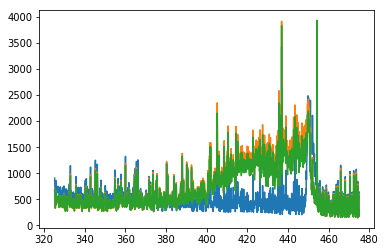

In [9]:
plt.plot(wavelen,meandark)
plt.plot(wavelen,np.mean(rawskyflux,axis=0))
plt.plot(wavelen,np.mean(rawvenusflux,axis=0))
plt.show()

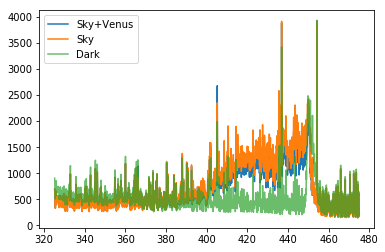

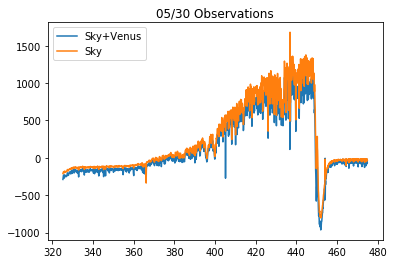

In [59]:
plt.plot(wavelen,np.mean(rawvenusflux[-11:],axis=0),label='Sky+Venus')
plt.plot(wavelen,np.mean(rawskyflux,axis=0),label='Sky')
plt.plot(wavelen,np.mean(darkflux,axis=0),alpha=.7,label='Dark')
plt.legend()
plt.show()

plt.plot(wavelen,np.mean(venusflux[:11],axis=0),label='Sky+Venus')
plt.plot(wavelen,np.mean(skyflux,axis=0),label='Sky')
plt.title('05/30 Observations')
plt.legend()
plt.savefig('0530obs.png')
plt.show()

# Difference between spectra taken early in the day and later in the day

In [45]:
early = '../venus_data/20180529/venus_1.dat'
wavelen,earlyflux,earlytime = get_data(early)
late = '../venus_data/20180529/venus_2.dat'
wavelen,lateflux,latetime = get_data(late)

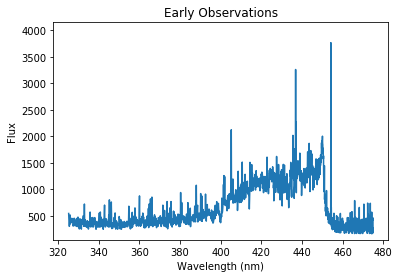

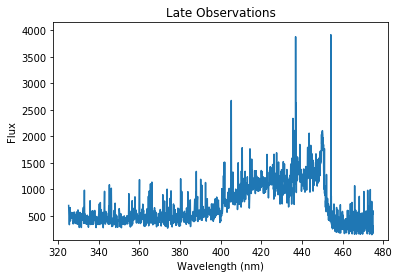

In [46]:
meanearly = np.mean(earlyflux[1:11],axis=0)
plt.plot(wavelen,meanearly)
plt.ylim(50,4150)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.title('Early Observations')
plt.savefig('earlyfullobs.png')
plt.show()

meanlate = np.mean(lateflux[-11:],axis=0)
plt.plot(wavelen,meanlate)
plt.ylim(50,4150)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.title('Late Observations')
plt.savefig('latefullobs.png')
plt.show()

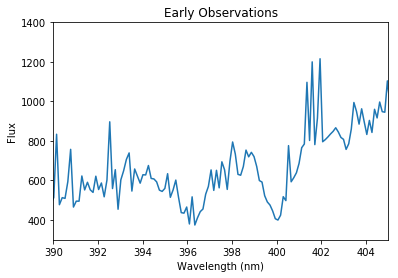

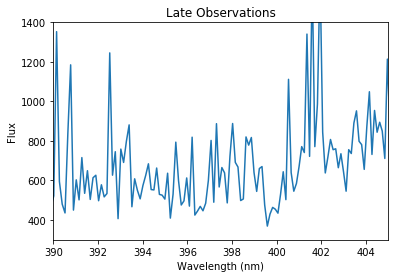

In [40]:
meanearly = np.mean(earlyflux[1:11],axis=0)
plt.plot(wavelen,meanearly)
plt.ylim(300,1400)
plt.xlim(390,405)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.title('Early Observations')
plt.savefig('earlyobs.png')
plt.show()

meanlate = np.mean(lateflux[-11:],axis=0)
plt.plot(wavelen,meanlate)
plt.ylim(300,1400)
plt.xlim(390,405)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.title('Late Observations')
plt.savefig('lateobs.png')
plt.show()